In [1]:
using Pkg
cd("/Users/aguinam1/Documents/Git/aaguinal.github.io/assets/slides/aaai-symposiumtalk-2023/julia")  # use this environment to avoid `constructor` error
Pkg.activate(".")
Pkg.instantiate()
using PrettyTables

using Catlab
using AlgebraicRewriting

############################### SCHEMA ###############################

  Activating project at `~/Documents/Git/aaguinal.github.io/assets/slides/aaai-symposiumtalk-2023/julia`
Precompiling project...
  ✓ InvertedIndices
  ✓ Permutations
  ✓ WorkerUtilities
  ✓ Compat
  ✓ PooledArrays
  ✓ OrderedCollections
  ✓ XML2_jll
  ✓ InlineStrings
  ✓ Compat → CompatLinearAlgebraExt
  ✓ SentinelArrays
  ✓ LightXML
  ✓ WeakRefStrings
  ✓ CSV
  ✓ PrettyTables
  ✓ ACSets
  ✓ DataFrames
  ✓ Catlab → CatlabDataFramesExt
  17 dependencies successfully precompiled in 179 seconds. 52 already precompiled.
  8 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


Create an ontology by defining a finite presentation of a freely generated category using @present macro

About the world: The Bread World Ontology has the types Thing, BreadLoaf, Countertop, and Stool. The Breadloaf, Countertop, and Stool types have morphisms to Thing that represent is-a relationships. The InOn type can be used to encode a set relation (as opposed to a function) that was two morphisms going to Thing. One morphism points out the LHS of the relation and the other morphism point out the RHS of the relation.

In [2]:
@present OntBreadWorld(FreeSchema) begin
  Thing::Ob
  BreadLoaf::Ob
  Countertop::Ob
  Stool::Ob

  BreadLoafIsThing::Hom(BreadLoaf, Thing)  # is-a
  CountertopIsThing::Hom(Countertop, Thing)  # is-a
  StoolIsThing::Hom(Stool, Thing)  # is-a

  InOn::Ob
  inOn_l::Hom(InOn, Thing)
  inOn_r::Hom(InOn, Thing)
end

Catlab.GATs.Presentations.Presentation{Catlab.Theories.ThSchema, Symbol}(Catlab.Theories.FreeSchema, (Ob = Catlab.Theories.FreeSchema.Ob{:generator}[Thing, BreadLoaf, Countertop, Stool, InOn], Hom = Catlab.Theories.FreeSchema.Hom{:generator}[BreadLoafIsThing, CountertopIsThing, StoolIsThing, inOn_l, inOn_r], AttrType = Catlab.Theories.FreeSchema.AttrType{:generator}[], Attr = Catlab.Theories.FreeSchema.Attr{:generator}[]), Dict(:inOn_r => (:Hom => 5), :CountertopIsThing => (:Hom => 2), :Countertop => (:Ob => 3), :BreadLoaf => (:Ob => 2), :Thing => (:Ob => 1), :BreadLoafIsThing => (:Hom => 1), :StoolIsThing => (:Hom => 3), :InOn => (:Ob => 5), :inOn_l => (:Hom => 4), :Stool => (:Ob => 4)…), Pair[])

Visualize the ontology

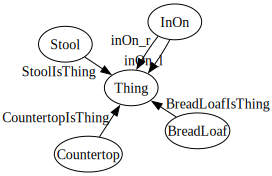

In [3]:
to_graphviz(OntBreadWorld)

Make the ontology an acset type

In [4]:
@acset_type BreadWorld(OntBreadWorld)

############################### RULE ###############################

Main.var"##392".BreadWorld

Construct rule by defining a span in the category of ACSets

Use the @acset macro to define an ACSet functor. The LHS refers to a type (or object) in our ontology and the RHS defines the set assignment using FinFunctions. For this, you need to completely specify the ACSet functor, i.e. every object and morphism in the index category must be specified.

About the rule: This rule moves a breadloaf from a countertop to a stool.

Left ACSet

In [5]:
L = @acset BreadWorld begin
  Thing = 3
  BreadLoaf = 1
  Countertop = 1
  Stool = 1

  BreadLoafIsThing = [1]
  CountertopIsThing = [2]
  StoolIsThing = [3]

  InOn = 1
  inOn_l = [1]
  inOn_r = [2]  # breadloaf is on the countertop
end

Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:1}
┌───────────┬──────────────────┐
│ BreadLoaf │ BreadLoafIsThing │
├───────────┼──────────────────┤
│         1 │                1 │
└───────────┴──────────────────┘
┌────────────┬───────────────────┐
│ Countertop │ CountertopIsThing │
├────────────┼───────────────────┤
│          1 │                 2 │
└────────────┴───────────────────┘
┌───────┬──────────────┐
│ Stool │ StoolIsThing │
├───────┼──────────────┤
│     1 │            3 │
└───────┴──────────────┘
┌──────┬────────┬────────┐
│ InOn │ inOn_l │ inOn_r │
├──────┼────────┼────────┤
│    1 │      1 │      2 │
└──────┴────────┴────────┘

Middle/Keep ACSet
The Thing, Breadloaf, Countertop, and Stool types should be held constant. The InOn type will change because we are changing the underlying set function.

In [6]:
K = @acset BreadWorld begin
  Thing = 3
  BreadLoaf = 1
  Countertop = 1
  Stool = 1
end

BreadLoaf,BreadLoafIsThing
1,0
Countertop,CountertopIsThing
1,0
Stool,StoolIsThing
1,0


Right ACSet

In [7]:
R = @acset BreadWorld begin
  Thing = 3
  BreadLoaf = 1
  Countertop = 1
  Stool = 1

  BreadLoafIsThing = [1]
  CountertopIsThing = [2]
  StoolIsThing = [3]

  InOn = 1
  inOn_l = [1]
  inOn_r = [3]  # breadloaf is on the stool
end

Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:1}
┌───────────┬──────────────────┐
│ BreadLoaf │ BreadLoafIsThing │
├───────────┼──────────────────┤
│         1 │                1 │
└───────────┴──────────────────┘
┌────────────┬───────────────────┐
│ Countertop │ CountertopIsThing │
├────────────┼───────────────────┤
│          1 │                 2 │
└────────────┴───────────────────┘
┌───────┬──────────────┐
│ Stool │ StoolIsThing │
├───────┼──────────────┤
│     1 │            3 │
└───────┴──────────────┘
┌──────┬────────┬────────┐
│ InOn │ inOn_l │ inOn_r │
├──────┼────────┼────────┤
│    1 │      1 │      3 │
└──────┴────────┴────────┘

Left leg of span

In [8]:
l = ACSetTransformation(K, L, Thing=[1, 2, 3], BreadLoaf=[1], Countertop=[1], Stool=[1])

ACSetTransformation((Thing = FinFunction([1, 2, 3], 3, 3), BreadLoaf = FinFunction([1], 1, 1), Countertop = FinFunction([1], 1, 1), Stool = FinFunction([1], 1, 1), InOn = FinFunction(1:0, 0, 1)), Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:0}, Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:1})

Right leg of span

In [9]:
r = ACSetTransformation(K, R, Thing=[1, 2, 3], BreadLoaf=[1], Countertop=[1], Stool=[1])

ACSetTransformation((Thing = FinFunction([1, 2, 3], 3, 3), BreadLoaf = FinFunction([1], 1, 1), Countertop = FinFunction([1], 1, 1), Stool = FinFunction([1], 1, 1), InOn = FinFunction(1:0, 0, 1)), Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:0}, Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:1})

Use AlgebraicRewriting.Rule wrapper to add a rule interface

In [10]:
moveBreadRule = Rule(l, r)

############################### WORLD STATE ###############################

Rule{:DPO}(ACSetTransformation((Thing = FinFunction([1, 2, 3], 3, 3), BreadLoaf = FinFunction([1], 1, 1), Countertop = FinFunction([1], 1, 1), Stool = FinFunction([1], 1, 1), InOn = FinFunction(1:0, 0, 1)), Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:0}, Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:1}), ACSetTransformation((Thing = FinFunction([1, 2, 3], 3, 3), BreadLoaf = FinFunction([1], 1, 1), Countertop = FinFunction([1], 1, 1), Stool = FinFunction([1], 1, 1), InOn = FinFunction(1:0, 0, 1)), Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:0}, Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:1}), Constraint[], false, Dict{Symbol, Dict{Int64, Union{Nothing, Function}}}())

Define a world state using the @acset macro. This is the ACSet way of specifying an ACSet. For this, you need to completely specify the ACSet functor, i.e. every object and morphism in the index category must be specified. The ACSets must be specified in terms of FinFunctions.

About the world state: In this world state, there are two countertops, one stool, and one breadloaf. All of these amount to four things. The breadloaf is on the first countertop.

In [11]:
state = @acset BreadWorld begin
  Thing = 4
  BreadLoaf = 1
  Countertop = 2
  Stool = 1

  BreadLoafIsThing = [1]
  CountertopIsThing = [2, 3] # there are two countertops
  StoolIsThing = [4]

  InOn = 1
  inOn_l = [1]  # breadloaf is on the countertop 1
  inOn_r = [2]
end

############################### APPLY RULE ###############################

Main.var"##392".BreadWorld {Thing:4, BreadLoaf:1, Countertop:2, Stool:1, InOn:1}
┌───────────┬──────────────────┐
│ BreadLoaf │ BreadLoafIsThing │
├───────────┼──────────────────┤
│         1 │                1 │
└───────────┴──────────────────┘
┌────────────┬───────────────────┐
│ Countertop │ CountertopIsThing │
├────────────┼───────────────────┤
│          1 │                 2 │
│          2 │                 3 │
└────────────┴───────────────────┘
┌───────┬──────────────┐
│ Stool │ StoolIsThing │
├───────┼──────────────┤
│     1 │            4 │
└───────┴──────────────┘
┌──────┬────────┬────────┐
│ InOn │ inOn_l │ inOn_r │
├──────┼────────┼────────┤
│    1 │      1 │      2 │
└──────┴────────┴────────┘

Use the AlgebraicRewriting.get_matches(::Rule{T}, ::ACSet) utility function to find matches between the rule and the state.

In [12]:
matches = get_matches(moveBreadRule, state)

1-element Vector{Any}:
 ACSetTransformation((Thing = FinFunction([1, 2, 4], 3, 4), BreadLoaf = FinFunction([1], 1, 1), Countertop = FinFunction([1], 1, 2), Stool = FinFunction([1], 1, 1), InOn = FinFunction([1], 1, 1)), Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:1}, Main.var"##392".BreadWorld {Thing:4, BreadLoaf:1, Countertop:2, Stool:1, InOn:1})

Take the first match

In [13]:
match = matches[1]

ACSetTransformation((Thing = FinFunction([1, 2, 4], 3, 4), BreadLoaf = FinFunction([1], 1, 1), Countertop = FinFunction([1], 1, 2), Stool = FinFunction([1], 1, 1), InOn = FinFunction([1], 1, 1)), Main.var"##392".BreadWorld {Thing:3, BreadLoaf:1, Countertop:1, Stool:1, InOn:1}, Main.var"##392".BreadWorld {Thing:4, BreadLoaf:1, Countertop:2, Stool:1, InOn:1})

Compute the new world state after rewriting

In [14]:
new_state = rewrite_match(moveBreadRule, match)

Main.var"##392".BreadWorld {Thing:4, BreadLoaf:1, Countertop:2, Stool:1, InOn:1}
┌───────────┬──────────────────┐
│ BreadLoaf │ BreadLoafIsThing │
├───────────┼──────────────────┤
│         1 │                1 │
└───────────┴──────────────────┘
┌────────────┬───────────────────┐
│ Countertop │ CountertopIsThing │
├────────────┼───────────────────┤
│          1 │                 2 │
│          2 │                 4 │
└────────────┴───────────────────┘
┌───────┬──────────────┐
│ Stool │ StoolIsThing │
├───────┼──────────────┤
│     1 │            3 │
└───────┴──────────────┘
┌──────┬────────┬────────┐
│ InOn │ inOn_l │ inOn_r │
├──────┼────────┼────────┤
│    1 │      1 │      3 │
└──────┴────────┴────────┘